In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error


In [2]:
# Opciones de pandas
rows, cols = 50, 50
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas

In [3]:
data = pd.read_csv('testconcat.csv', header=[0,1], index_col=0)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)
data

Attributes       Close                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.255194   14.186936    2.770183    1.143114   
1985-03-04    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-05    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-06    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-07    1.637751   3.033250   13.586567    2.822849    1.144183   
...                ...        ...         ...         ...         ...   
2020-12-23  244.250000  92.720818  122.266174  232.182770  144.410004   
2020-12-24  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-28  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-29  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-30  246.679993  93.030212  122.700371  235.031281  147.309998   

Attributes   CloseNext                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.687380   3.033250   14.095586    2.754384    1.141212   
1985-03-04    1.655797   3.107232   14.095586    2.738583    1.164987   
1985-03-05    1.642262   3.088737   13.873695    2.759651    1.147157   
1985-03-06    1.637751   3.033250   13.586567    2.822849    1.144183   
1985-03-07    1.619704   3.005508   13.534367    2.775449    1.141212   
...                ...        ...         ...         ...         ...   
2020-12-23  247.990005  92.690872  123.045761  233.447678  145.059998   
2020-12-24  248.149994  93.110062  123.174042  235.758347  146.910004   
2020-12-28  248.350006  91.982246  122.167496  233.049286  147.419998   
2020-12-29  246.679993  93.030212  122.700371  235.031281  147.309998   
2020-12-30         NaN        NaN         NaN         NaN         NaN   

Attributes        High                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.721667   3.292185   14.278297    2.785982    1.154899   
1985-03-04    1.718962   3.273691   14.239152    2.785983    1.153099   
1985-03-05    1.687378   3.125728   14.186946    2.754383    1.170931   
1985-03-06    1.673845   3.107232   14.147776    2.775450    1.167960   
1985-03-07    1.642263   3.088737   13.925905    2.822849    1.153099   
...                ...        ...         ...         ...         ...   
2020-12-23  247.229996  93.449405  123.558897  233.258430  145.600006   
2020-12-24  249.250000  93.379536  123.450351  233.995469  145.110001   
2020-12-28  249.869995  94.477422  124.930568  237.511265  147.600006   
2020-12-29  250.750000  93.589134  123.825342  237.411666  148.770004   
2020-12-30  249.339996  93.658994  123.203648  235.987428  147.990005   

Attributes         Low                                                 \
Symbol             BDX         GL         IBM         NSC         PEP   
1985-03-01    1.676832   3.236698   13.991164    2.743850    1.125437   
1985-03-04    1.678356   2.996260   14.030328    2.743851    1.135268   
1985-03-05    1.651285   3.051746   14.056431    2.717518    1.141212   
1985-03-06    1.642262   3.051746   13.860644    2.717519    1.144184   
1985-03-07    1.624216   3.033250   13.573515    2.759651    1.132296   
...                ...        ...         ...         ...         ...   
2020-12-23  244.179993  91.932340  122.108281  229.573308  144.070007   
2020-12-24  244.899994  91.702776  122.572087  230.698779  144.139999   
2020-12-28  247.289993  92.750755  122.818788  234.244453  145.539993   
2020-12-29  247.279999  91.902399  121.614875  231.515469  146.839996   
2020-12-30  246.589996  92.471295  121.999734  233.059245  147.009995   

Attributes        Open                                                 ...  \
Symbol             BDX         GL         IBM         NSC         PEP  ...   
1985-03-01    1.676832   0.000000   14.04337

In [4]:
#Cuál es el número de registros?
#Cuál es el número de atributos?
shape = data.shape
shape

(9033, 80)

In [5]:
stocks_list = data.xs('Close', level=0, axis=1).columns
for i in stocks_list:
    print("stock",i)
    # Cual es el máximo de datos faltantes en un mismo registro?
    print(max(data.xs(i, level=1, axis=1).isnull().sum(axis=1)))
    #Cuantos datos faltantes hay por cada atributo?
    print(data.xs(i, level=1, axis=1).isnull().sum())

stock BDX
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock GL
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           3
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock IBM
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop           0
ema20         0
ema200        0
lower        19
ma20         19
macd          0
momentum      1
signal        0
std20d       19
upper        19
dtype: int64
stock NSC
5
Attributes
Close         0
CloseNext     1
High          0
Low           0
Open          0
Volume        0
bop   

## limpieza

En el primer box realizo una limpieza teniendo todas las acciones para que sea mas facil, ya que estas fechas en todas las acciones estan vacias por lo tanto se eliminan.

En el segundo box se borran estas acciones las cuales tienen muchos datos vacios

En el tercer box se hace uso de ffill 'forward fill' and will propagate last valid observation forward. inplace : If True, fill in place.

In [6]:
#se borran estas fechas las cuales estan vacias en todas las acciones
date_drops = ['2020-12-31','2020-12-30']
data.drop(date_drops, axis=0, errors='ignore', inplace=True)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m-%d'), inplace=True)

In [7]:
#borrar desde 1980
data.drop(data.index[:data.index.get_loc('1985-03-05')], axis=0, inplace=True)

In [8]:
# missing values in the data are interpolated using forward-fill (‘ffill ()’)method to propagate last valid observation forward.
data = data.fillna(method='bfill')

In [9]:
#se borran estos datos debido a la alta correlacion
attributes_to_erase = ('High','Low','Open','ma20','lower','upper','ema20')
for i in attributes_to_erase:
    data=data.drop(i, axis=1, level=0)

## algunos analisis individuales

<AxesSubplot:xlabel='Attributes', ylabel='Attributes'>

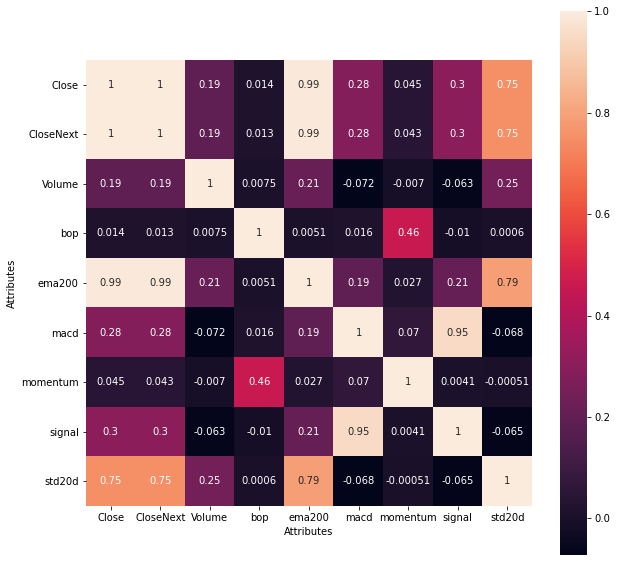

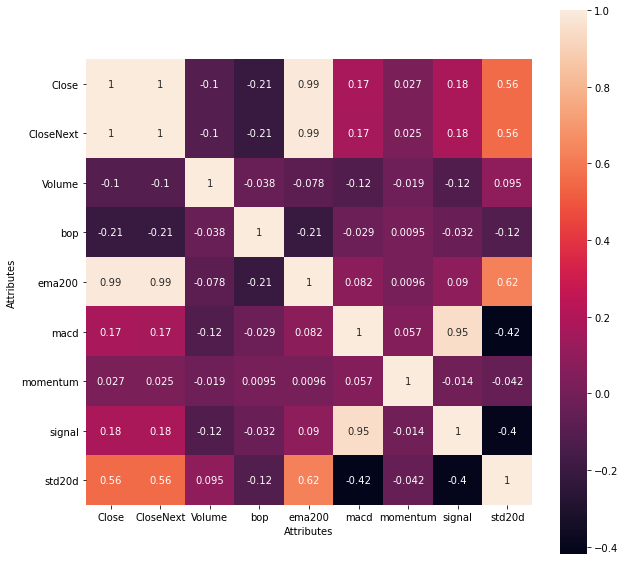

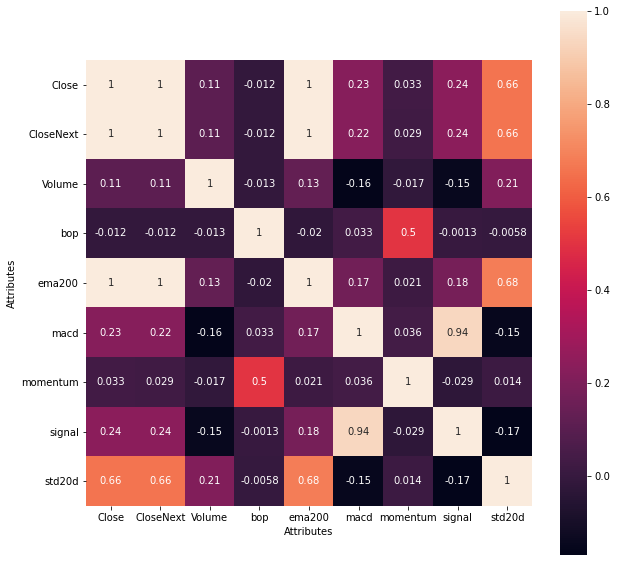

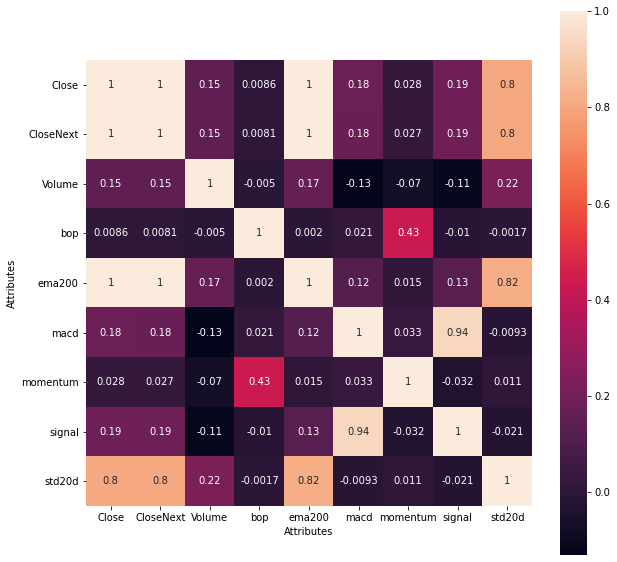

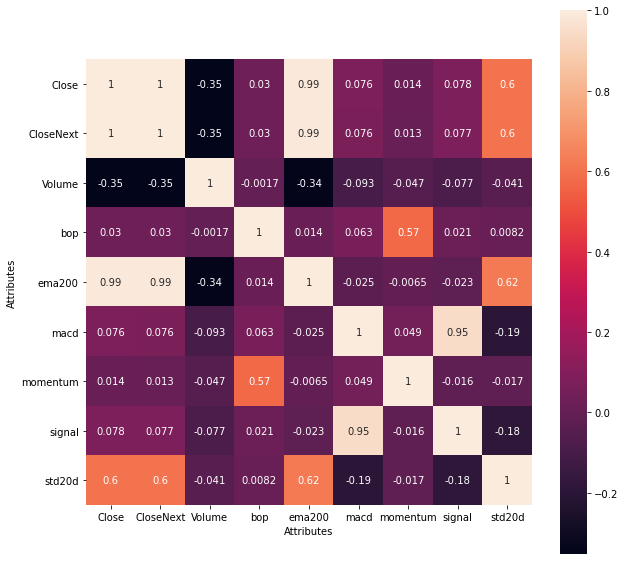

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('NSC', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('GL', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('PEP', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('BDX', level=1, axis=1).corr(), square=True, annot=True, ax=ax)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.xs('IBM', level=1, axis=1).corr(), square=True, annot=True, ax=ax)

## Modelo base

In [11]:
dataNSC = data.xs('NSC', level=1, axis=1)
dataNSC

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,2.738583,2.759651,1125900,-0.142862,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.759651,2.822849,1773900,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.822849,2.775449,770400,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.775449,2.764918,3031200,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918,2.764918,936900,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...
2020-12-22,229.573318,232.182770,806200,0.247494,204.485850,-0.342254,0.358551,1.149920,4.805877
2020-12-23,232.182770,233.447678,1209200,0.324324,204.761441,-0.292470,2.609451,0.861442,4.598120
2020-12-24,233.447678,235.758347,383100,0.353474,205.046876,-0.149229,1.264908,0.659308,4.392238
2020-12-28,235.758347,233.049286,785100,0.149392,205.352463,0.149025,2.310669,0.557251,4.048430


In [15]:
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data.sort_index(ascending=True, inplace=True)
    df = data.xs(stock, level=1, axis=1)
    X_scaled = np.array(df.drop(['CloseNext'], axis=1))
    y_scaled = np.array(df['CloseNext'])
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=2021)
    y_test_pred = list()
    for x in y_test:
        y_test_pred.append(df.iloc[list(y_scaled).index(x)]['Close'])
    y_test = np.array(y_test)
    y_test_pred = np.array(y_test_pred)
    print(stock)
    mape = mean_absolute_percentage_error(y_test,y_test_pred)
    rmse = mean_squared_error(y_test,y_test_pred, squared=False)
    mae=mean_absolute_error(y_test,y_test_pred)
    print("mape:",mape)
    print("rmse:",rmse)
    print("mae:",mae)

NSC
mape: 0.014039020154954085
rmse: 1.2966159155906007
mae: 0.564885338719545
GL
mape: 0.01318531741389161
rmse: 0.6272791586603801
mae: 0.27341993143744203
PEP
mape: 0.011487032344821685
rmse: 0.762813775829839
mae: 0.36723005256779595
BDX
mape: 0.012266984032832542
rmse: 1.4286627872019115
mae: 0.635300678228179
IBM
mape: 0.012334459780269187
rmse: 1.3021315956247324
mae: 0.7466066405534656


## 1) Modelo donde escalamos solo las variables independientes

In [11]:
X = data.drop(['CloseNext'], level=0, axis=1)
y = data['CloseNext']

In [15]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['CloseNext'] = y[stockName].values
    return df

In [16]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data_scaler = pd.DataFrame()
for stock in stock_sel:
    df2 = dfM(stock, X) 
    df2.columns = pd.MultiIndex.from_product([df2.columns, [stock]], names=['Attributes', 'Symbol'])
    data_scaler = pd.concat([data_scaler, df2], axis=1).sort_index(axis=1)

data_scaler

Attributes     Close                                           CloseNext  \
Symbol           BDX        GL       IBM       NSC       PEP         BDX   
1985-03-05 -0.827281 -0.839889 -1.073245 -0.796551 -1.079229    1.642262   
1985-03-06 -0.827475 -0.840615 -1.077965 -0.796121 -1.079732    1.637751   
1985-03-07 -0.827539 -0.842794 -1.084072 -0.794829 -1.079816    1.619704   
1985-03-08 -0.827797 -0.843884 -1.085183 -0.795798 -1.079899    1.588121   
1985-03-11 -0.828249 -0.844974 -1.081018 -0.796013 -1.079816    1.606167   
...              ...       ...       ...       ...       ...         ...   
2020-12-22  2.666565  2.634794  1.221644  3.839015  2.945634  244.250000   
2020-12-23  2.642963  2.679876  1.227731  3.892342  2.956622  247.990005   
2020-12-24  2.696462  2.678700  1.244314  3.918191  2.974935  248.149994   
2020-12-28  2.698751  2.695165  1.247043  3.965412  3.027058  248.350006   
2020-12-29  2.701612  2.650867  1.225632  3.910050  3.041427  246.679993   

Attributes                                                   Volume            \
Symbol             GL         IBM         NSC         PEP       BDX        GL   
1985-03-05   3.088737   13.873695    2.759651    1.147157 -0.719720 -0.594723   
1985-03-06   3.033250   13.586567    2.822849    1.144183 -0.242853 -0.508574   
1985-03-07   3.005508   13.534367    2.775449    1.141212  0.423002 -0.960252   
1985-03-08   2.977763   13.730146    2.764918    1.144183 -0.154951 -0.962667   
1985-03-11   3.060992   13.769285    2.764918    1.159043 -0.559299 -0.271866   
...               ...         ...         ...         ...       ...       ...   
2020-12-22  92.720818  122.266174  232.182770  144.410004 -0.218268 -0.511705   
2020-12-23  92.690872  123.045761  233.447678  145.059998 -0.247935 -0.384435   
2020-12-24  93.110062  123.174042  235.758347  146.910004 -0.906511 -0.954825   
2020-12-28  91.982246  122.167496  233.049286  147.419998 -0.625637 -0.633488   
2020-12-29  93.030212  122.700371  235.031281  147.309998 -0.388715 -0.431550   

Attributes                                     bop                      \
Symbol           IBM       NSC       PEP       BDX        GL       IBM   
1985-03-05 -0.696469 -0.370145  0.178135 -1.156526  2.141280 -0.582557   
1985-03-06 -0.678160  0.101955 -0.369045 -1.572225  2.916646 -1.541034   
1985-03-07 -0.012646 -0.629145 -0.024218 -0.484997  2.859899 -1.260778   
1985-03-08 -0.043771  1.017961 -0.735208 -1.231152  4.368079 -0.890839   
1985-03-11 -0.658936 -0.507841 -1.177081 -1.380377  1.585294  1.475225   
...              ...       ...       ...       ...       ...       ...   
2020-12-22 -0.628705 -0.603063 -0.777690 -0.869343 -0.261843  0.278933   
2020-12-23 -1.004532 -0.309457 -0.780978 -1.698887 -0.212034 -0.002479   
2020-12-24 -1.218010 -0.911313 -1.454648  1.234673 -0.256042 -0.671920   
2020-12-28 -0.793687 -0.618435 -0.838946 -0.488501 -0.246440 -0.269665   
2020-12-29 -0.823026 -0.512941 -0.573883 -0.584364 -0.293890 -1.307564   

Attributes                        ema200                                \
Symbol           NSC       PEP       BDX        GL       IBM       NSC   
1985-03-05 -0.299008  1.250722 -0.821408 -0.829413 -1.058602 -0.809074   
1985-03-06  0.633997 -1.535893 -0.821420 -0.829480 -1.058669 -0.809076   
1985-03-07  1.806196  0.179964 -0.821432 -0.829568 -1.058797 -0.809065   
1985-03-08 -1.647641 -0.863304 -0.821447 -0.829666 -1.058934 -0.809063   
1985-03-11 -0.496361 -0.735243 -0.821466 -0.829774 -1.059028 -0.809065   
...              ...       ...       ...       ...       ...       ...   
2020-12-22  0.420046 -0.827889  2.769609  2.516586  1.205041  3.636466   
2020-12-23  0.561569 -0.195053  2.769846  2.519608  1.205655  3.642539   
2020-12-24  0.615266  0.361117  2.770635  2.522587  1.206430  3.648830   
2020-12-28  0.239337  0.959637  2.771440  2.525708  1.207224  3.655565   
2020-12-29 -0.950645 -0.353455  2.772266  2.528339  1.207795  3.661638   

Attributes                macd 

## Trabajo con la accion NSC usando standarizacion

In [17]:
dataNSC_scaler = data_scaler.xs('NSC', level=1, axis=1)
dataNSC_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,-0.796551,2.759651,-0.370145,-0.299008,-0.809074,-0.138570,-0.034611,-0.145445,-0.632713
1985-03-06,-0.796121,2.822849,0.101955,0.633997,-0.809076,-0.138592,-0.003717,-0.145872,-0.632713
1985-03-07,-0.794829,2.775449,-0.629145,1.806196,-0.809065,-0.134731,0.031587,-0.145390,-0.632713
1985-03-08,-0.795798,2.764918,1.017961,-1.647641,-0.809063,-0.134606,-0.061090,-0.144978,-0.632713
1985-03-11,-0.796013,2.764918,-0.507841,-0.496361,-0.809065,-0.135163,-0.030196,-0.144767,-0.632713
...,...,...,...,...,...,...,...,...,...
2020-12-22,3.839015,232.182770,-0.603063,0.420046,3.636466,-0.397124,0.279083,0.790954,2.008182
2020-12-23,3.892342,233.447678,-0.309457,0.561569,3.642539,-0.359127,2.165260,0.556225,1.892915
2020-12-24,3.918191,235.758347,-0.911313,0.615266,3.648830,-0.249800,1.038579,0.391753,1.778689
2020-12-28,3.965412,233.049286,-0.618435,0.239337,3.655565,-0.022162,1.914891,0.308711,1.587939


In [18]:
# Realizamos el holdout
HOLDOUT = 5
for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(dataNSC_scaler.drop(['CloseNext'], axis=1), dataNSC_scaler['CloseNext'], test_size=0.3)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    rf_clf = RandomForestRegressor(bootstrap=True, n_jobs=-1,)
    parameter_space = {
        'n_estimators': [80, 100, 150],
        'min_samples_leaf': [1, 3],
        'max_features': ['auto', 0.5],
        'oob_score': [True],
        'max_leaf_nodes' :[None],
        'max_samples':[None,100]
    }
    clf = GridSearchCV(rf_clf, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)

    pred = clf.predict(X_test)
    r2Score = r2_score(y_test,pred)
    rmse = mean_squared_error(y_test,pred, squared=False)
    mae=median_absolute_error(y_test,pred)
    evs=explained_variance_score(y_test, pred)
    mape=mean_absolute_percentage_error(y_test, pred)
    p=8
    n=len(y_test)
    Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
    clf_params = clf.best_params_
    
    print(clf_params)
    print(clf.best_score_)
    print("r2Score:",r2Score)
    print("adjustr2Score:",Adj_r2)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("mape:",mape)
    print("random_seeds",i)

{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True}
0.9993840794149187
r2Score: 0.9993591047020326
adjustr2Score: 0.9993572057530016
rmse: 1.237305514057549
mae: 0.20119647979736044
evs: 0.9993599908842448
mape: 0.014020850582599156
random_seeds 0
{'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 3, 'n_estimators': 100, 'oob_score': True}
0.9993057109623722
r2Score: 0.999347293742982
adjustr2Score: 0.9993453597985168
rmse: 1.2876947928778317
mae: 0.2190603312424262
evs: 0.9993473404876885
mape: 0.014278642830593996
random_seeds 1
{'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
0.9993263746033506
r2Score: 0.9994248933518893
adjustr2Score: 0.9994231893321912
rmse: 1.169025059038954
mae: 0.21496395111084254
evs: 0.9994249832685596
mape: 0.014316431935338216
random_seeds 2
{'max_features': 0.5,

In [19]:
X_train, X_test, y_train, y_test = train_test_split(dataNSC_scaler.drop(['CloseNext'], axis=1), dataNSC_scaler['CloseNext'], test_size=0.3, random_state=5)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf.fit(X_train,y_train)

pred = clf.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)
p=9
n=len(y_test)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
print("adjustr2Score:",Adj_r2)
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)
print("random_seeds",i)

adjustr2Score: 0.9993677512477638
r2Score: 0.9993698525176198
rmse: 1.253870820779336
mae: 0.22069168090820312
evs: 0.9993714427674147
random_seeds 4


## Prediccion de todas las acciones, escalandolas

'NSC'

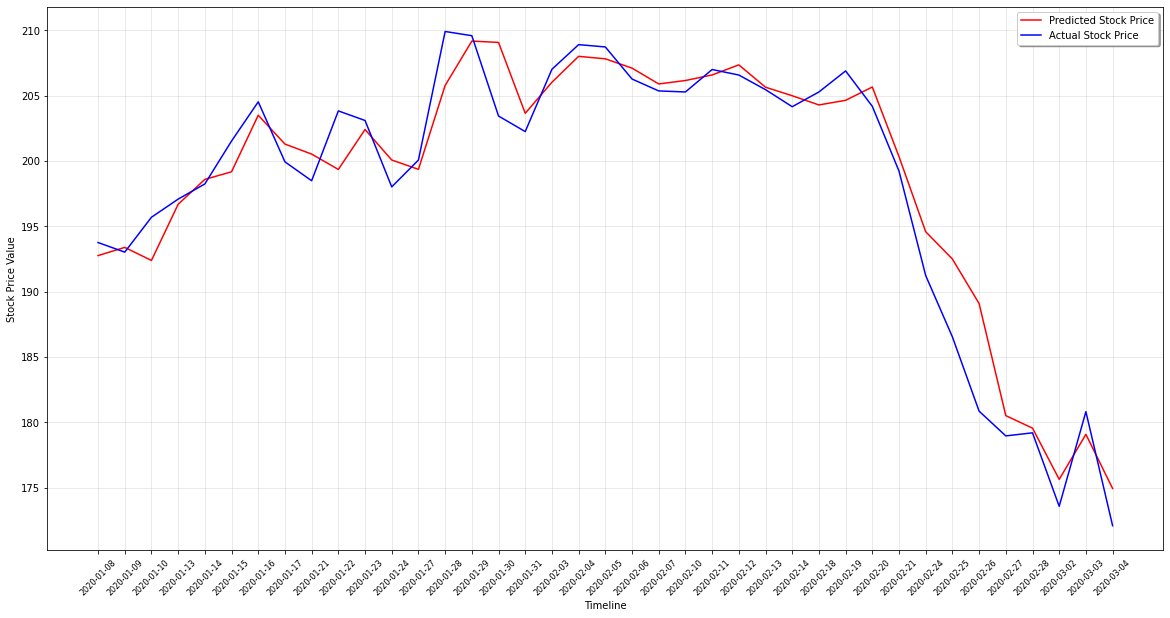

RMSE train 0.8520800220040737
r2Score: 0.9993947653454892
adj_r2Score: 0.999393421499462
rmse: 1.2020050351341958
mae: 0.20982992649078192
evs: 0.999394810746901
mape: 0.014258157279221275
random_seeds 3


'GL'

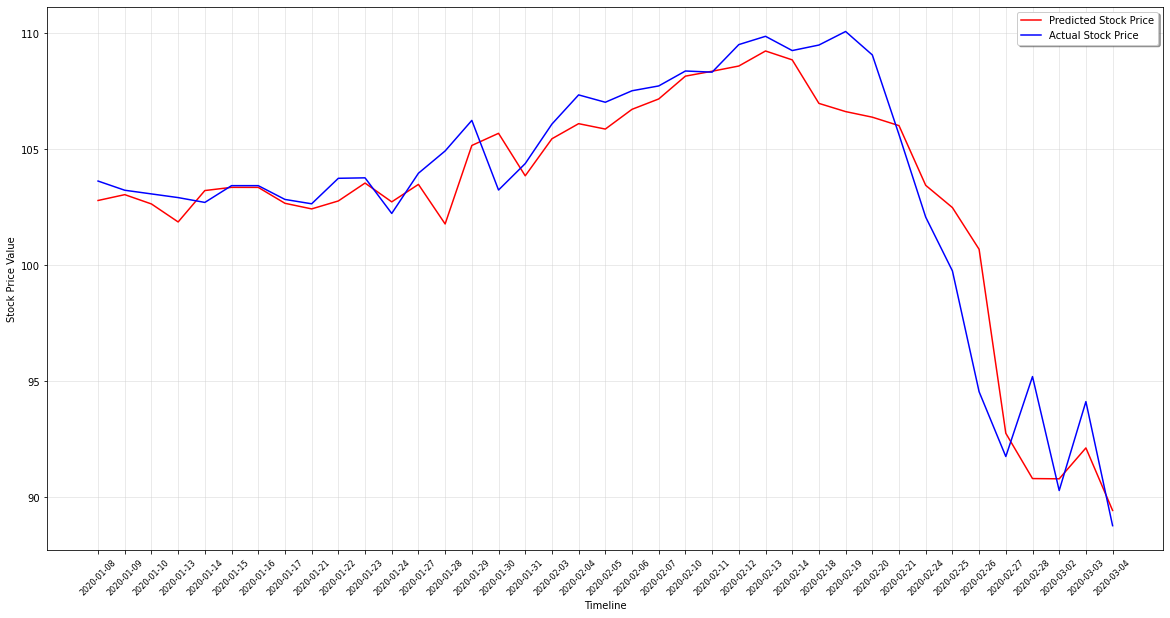

RMSE train 0.3995172776946849
r2Score: 0.9995043710919103
adj_r2Score: 0.9995032706114038
rmse: 0.5674338829812857
mae: 0.10887036696076469
evs: 0.9995044005434272
mape: 0.012760115295423967
random_seeds 3


'PEP'

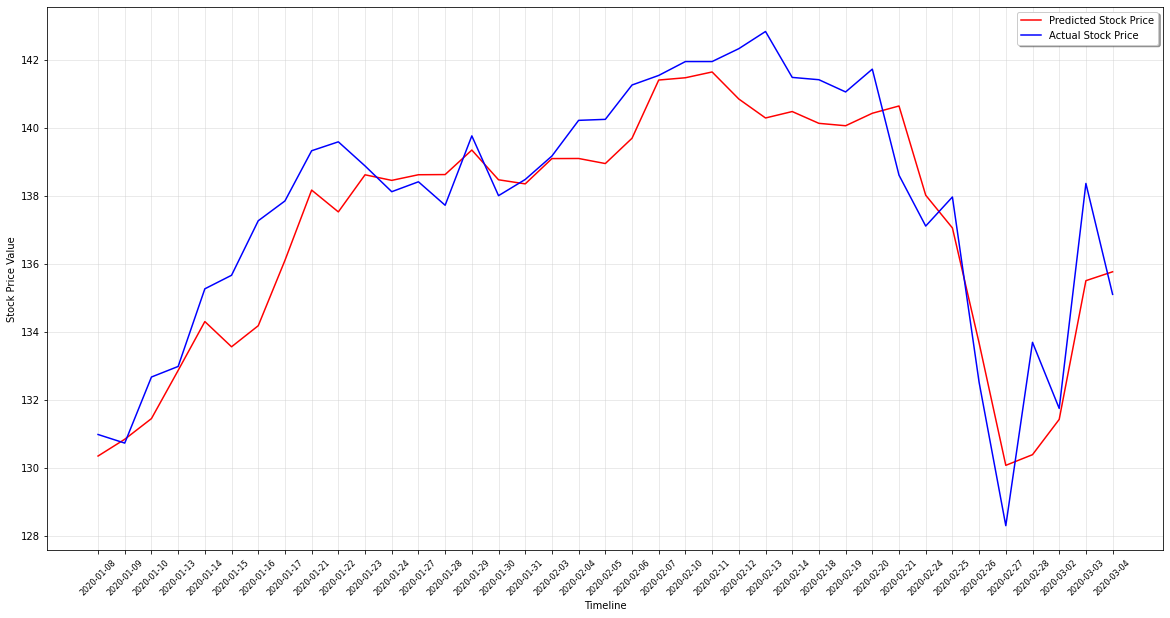

RMSE train 0.4552144994796176
r2Score: 0.9996895050240754
adj_r2Score: 0.999688815609752
rmse: 0.6284552772620619
mae: 0.18825972378253875
evs: 0.9996901818050954
mape: 0.011197376024096192
random_seeds 3


'BDX'

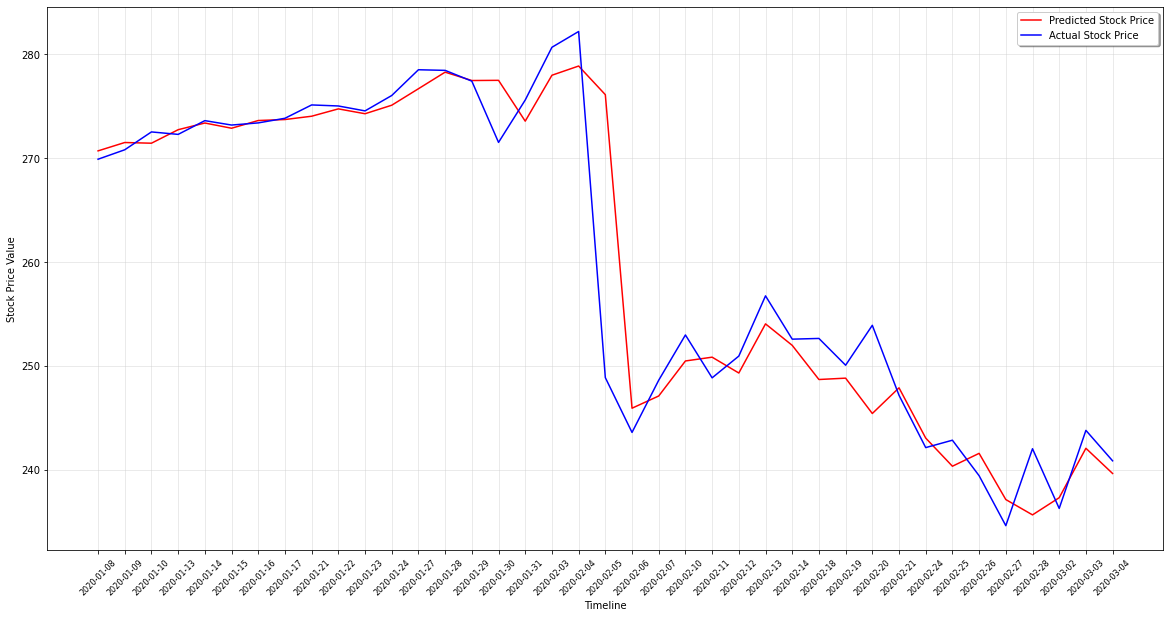

RMSE train 1.0085777523142825
r2Score: 0.9995698451825104
adj_r2Score: 0.9995688900788356
rmse: 1.450101988497796
mae: 0.22871286869049
evs: 0.9995700286308479
mape: 0.011787141975179403
random_seeds 3


'IBM'

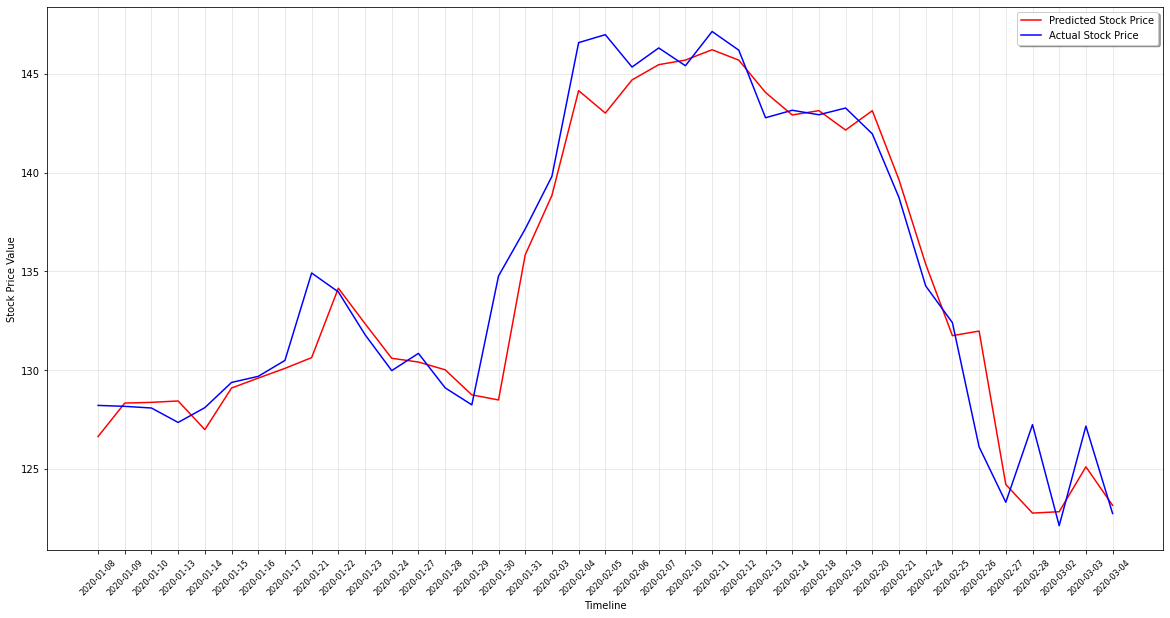

RMSE train 0.8655643309251456
r2Score: 0.9993132121457826
adj_r2Score: 0.9993116872213214
rmse: 1.2347932291229586
mae: 0.3678890645503987
evs: 0.9993132140416504
mape: 0.01258215479777352
random_seeds 3


In [26]:
Params = {'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True, 'rs':[0,2,3]}

for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    display(stock)
    df = data_scaler.xs(stock, level=1, axis=1)
    df.sort_index(ascending=True, inplace=True)
    X_scaled = np.array(df.drop(['CloseNext'], axis=1))
    y_scaled = np.array(df['CloseNext'])
    
    rand_stt = None
    min_error = 1000
    for i in Params['rs']:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=i)
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
        clf.fit(X_train,y_train)
        error = mean_squared_error(y_test, clf.predict(X_test), squared=False)
        if error < min_error:
            rand_stt = i
            min_error = error

    #Results log
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=rand_stt)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
    clf.fit(X_train,y_train)
    PRED = clf.predict(X_scaled)
  
    START_DATE_FOR_PLOTTING = '2020-01-08'
    ENDING_DATE_FOR_PLOTTING = '2020-03-05'
    START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
    ENDING_INDEX = df.index.get_loc(ENDING_DATE_FOR_PLOTTING)
    fig1,ax1 = plt.subplots(figsize=(20,10))


    plt.plot(df.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
    plt.plot(df.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

    #plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

    plt.grid(which='major', color='#cccccc', alpha=0.5)

    plt.legend(shadow=True)
    #plt.title(params, family='DejaVu Sans', fontsize=12)
    plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
    plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.show()
    
    pred1 = clf.predict(X_test) 
    r2Score = r2_score(y_test,pred1)
    rmse = mean_squared_error(y_test,pred1, squared=False)
    mae=median_absolute_error(y_test,pred1)
    evs=explained_variance_score(y_test, pred1)
    mape=mean_absolute_percentage_error(y_test, pred1)
    p=8
    n=len(y_test)
    Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
    
    print("RMSE train",mean_squared_error(y_scaled, PRED, squared=False))
    print("r2Score:",r2Score)
    print("adj_r2Score:",Adj_r2)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("mape:",mape)
    print("random_seeds",i)
    

## Separamos los datos manualmente

In [27]:
dataNSC_train_scaler = dataNSC_scaler.drop(dataNSC_scaler.index[dataNSC_scaler.index.get_loc('2019-01-03'):], axis=0)
dataNSC_test_scaler = dataNSC_scaler.drop(dataNSC_scaler.index[:dataNSC_scaler.index.get_loc('2019-01-03')], axis=0)
dataNSC_train_scaler

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,-0.796551,2.759651,-0.370145,-0.299008,-0.809074,-0.138570,-0.034611,-0.145445,-0.632713
1985-03-06,-0.796121,2.822849,0.101955,0.633997,-0.809076,-0.138592,-0.003717,-0.145872,-0.632713
1985-03-07,-0.794829,2.775449,-0.629145,1.806196,-0.809065,-0.134731,0.031587,-0.145390,-0.632713
1985-03-08,-0.795798,2.764918,1.017961,-1.647641,-0.809063,-0.134606,-0.061090,-0.144978,-0.632713
1985-03-11,-0.796013,2.764918,-0.507841,-0.496361,-0.809065,-0.135163,-0.030196,-0.144767,-0.632713
...,...,...,...,...,...,...,...,...,...
2018-12-26,2.031198,142.672089,0.268793,1.328169,2.466490,-4.572962,5.992098,-3.995947,4.477009
2018-12-27,2.063113,141.809769,-0.176934,1.135231,2.464577,-4.291628,1.287273,-4.111776,4.476637
2018-12-28,2.045490,143.275711,-0.157190,-1.255053,2.462493,-4.076353,-0.743966,-4.158538,4.304764
2018-12-31,2.075448,143.275711,-0.227568,0.867114,2.460752,-3.773531,1.207039,-4.131381,4.015594


In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataNSC_train_scaler.drop(['CloseNext'], axis=1), dataNSC_train_scaler['CloseNext'], shuffle=True, test_size=0.2, random_state=15)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf2 = RandomForestRegressor(max_features= None, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf2.fit(X_train,y_train)
# Se hace la prediccion sobre los datos de prueba
pred = clf2.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)
mape=mean_absolute_percentage_error(y_test, pred)
p=8
n=len(y_test)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
print("mape:",mape)
print("Adj_r2Score:",Adj_r2)
print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
#best possible value = 1
print("evs:",evs)



mape: 0.014491283847622315
Adj_r2Score: 0.9993224975103154
r2Score: 0.9993256764076277
rmse: 0.8900872805551084
mae: 0.19978268146515088
evs: 0.9993257241640165


In [29]:
pred2=clf2.predict(dataNSC_test_scaler.drop(['CloseNext'], axis=1))
y_test_data2 = np.array(dataNSC_test_scaler['CloseNext'])

r2Score = r2_score(y_test_data2, pred2)
rmse = mean_squared_error(y_test_data2, pred2, squared=False)
mae=median_absolute_error(y_test_data2, pred2)
evs=explained_variance_score(y_test_data2, pred2)
mape=mean_absolute_percentage_error(y_test_data2, pred2)
p=8
n=len(y_test)
Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
print("mape:",mape)
print("Adj_r2Score:",Adj_r2)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)

mape: 0.0886859626264279
Adj_r2Score: -0.21141416351922881
r2Score: -0.205730108793039
rmse: 25.237177313797112
mae: 13.208156509399387
evs: 0.35137840118878383


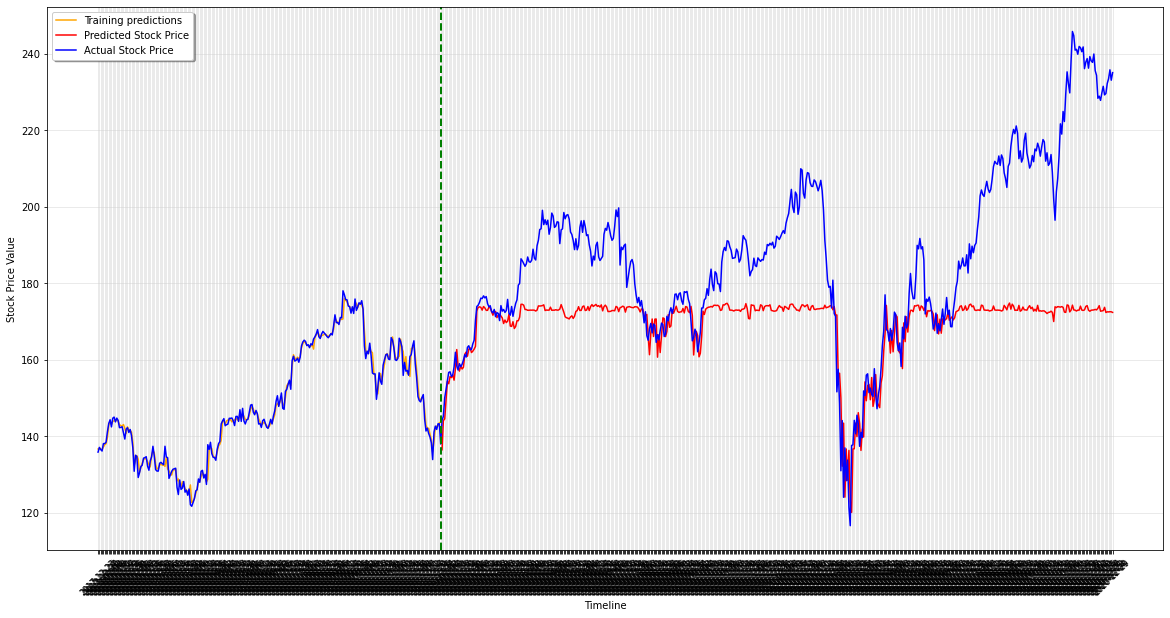

In [31]:
# Chage on attributes and no change on PricePerShare
# Reduced attributes
PRED_TRAIN = clf2.predict(dataNSC_train_scaler.drop(['CloseNext'], axis=1))
PRED_FUTURE = clf2.predict(dataNSC_test_scaler.drop(['CloseNext'], axis=1))
# Plot parameters
START_DATE_FOR_PLOTTING = '2017-12-22'
START_INDEX = dataNSC_train_scaler.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSC_train_scaler.index[START_INDEX:], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(dataNSC_test_scaler.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSC_scaler.index[START_INDEX:], dataNSC_scaler['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

plt.axvline(x = dataNSC_train_scaler.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

#print("RMSE",mean_squared_error(dataNSC_train['CloseNext'], PRED_TRAIN, squared=False))

## 2) Modelo donde escalamos las variables independientes y la dependiente

## Se quiere separar un conjunto para pruebas y uno para test manualmente

In [32]:
dataNSC_train = dataNSC.drop(dataNSC.index[dataNSC.index.get_loc('2019-01-03'):], axis=0)
dataNSC_test = dataNSC.drop(dataNSC.index[:dataNSC.index.get_loc('2019-01-03')], axis=0)
dataNSC_train

Attributes,Close,CloseNext,Volume,bop,ema200,macd,momentum,signal,std20d
1985-03-05,2.738583,2.759651,1125900,-0.142862,2.769713,-0.003494,-0.015801,-0.000900,0.045925
1985-03-06,2.759651,2.822849,1773900,0.363643,2.769613,-0.003523,0.021068,-0.001425,0.045925
1985-03-07,2.822849,2.775449,770400,1.000000,2.770142,0.001535,0.063198,-0.000833,0.045925
1985-03-08,2.775449,2.764918,3031200,-0.875001,2.770195,0.001700,-0.047400,-0.000326,0.045925
1985-03-11,2.764918,2.764918,936900,-0.250000,2.770143,0.000969,-0.010531,-0.000067,0.045925
...,...,...,...,...,...,...,...,...,...
2018-12-26,141.110397,142.672089,2002900,0.740491,151.398282,-5.813475,7.176270,-4.733109,9.255695
2018-12-27,142.672089,141.809769,1391100,0.635750,151.311455,-5.444868,1.561691,-4.875461,9.255023
2018-12-28,141.809769,143.275711,1418200,-0.661875,151.216911,-5.162813,-0.862320,-4.932931,8.945240
2018-12-31,143.275711,143.275711,1321600,0.490196,151.137894,-4.766052,1.465942,-4.899555,8.424039


## Estandarizamos los dos dataframes

In [33]:
X = np.array(dataNSC_train.drop(['CloseNext'], axis=1))
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X)
sc_predict = StandardScaler()
y_scaled_train = sc_predict.fit_transform(dataNSC_train.values[:, dataNSC_train.columns.get_loc('CloseNext'):dataNSC_train.columns.get_loc('CloseNext')+1])

In [34]:
X = np.array(dataNSC_test.drop(['CloseNext'], axis=1))
sc2 = StandardScaler()
X_scaled_test = sc2.fit_transform(X)
sc2_predict = StandardScaler()
y_scaled_test = sc2_predict.fit_transform(dataNSC_test.values[:, dataNSC_test.columns.get_loc('CloseNext'):dataNSC_test.columns.get_loc('CloseNext')+1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_train, y_scaled_train, shuffle=True, test_size=0.2, random_state=15)
y_train = y_train.ravel()
y_test = y_test.ravel()
clf2 = RandomForestRegressor(max_features= 0.5, max_leaf_nodes= None, max_samples= None, min_samples_leaf= 1,n_estimators=100,  oob_score= True)
clf2.fit(X_train,y_train)
# Se hace la prediccion sobre los datos de prueba
pred = clf2.predict(X_test)
r2Score = r2_score(y_test,pred)
rmse = mean_squared_error(y_test,pred, squared=False)
mae=median_absolute_error(y_test,pred)
evs=explained_variance_score(y_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
#best possible value = 1
print("evs:",evs)
print("random_seeds",i)



r2Score: 0.9993861091993749
rmse: 0.024539768673716558
mae: 0.005534537649313248
evs: 0.9993861132075187
random_seeds 3


In [36]:
pred = clf2.predict(X_scaled_test)
r2Score = r2_score(y_scaled_test,pred)
rmse = mean_squared_error(y_scaled_test,pred, squared=False)
mae=median_absolute_error(y_scaled_test,pred)
evs=explained_variance_score(y_scaled_test, pred)

print("r2Score:",r2Score)
print("rmse:",rmse)
print("mae:",mae)
print("evs:",evs)

r2Score: 0.7594971467563825
rmse: 0.49041090245182917
mae: 0.1779095222949389
evs: 0.7754842126573929


## Graficaremos la prediccion usando un conjunto de entrenamiento y otro de pruebas

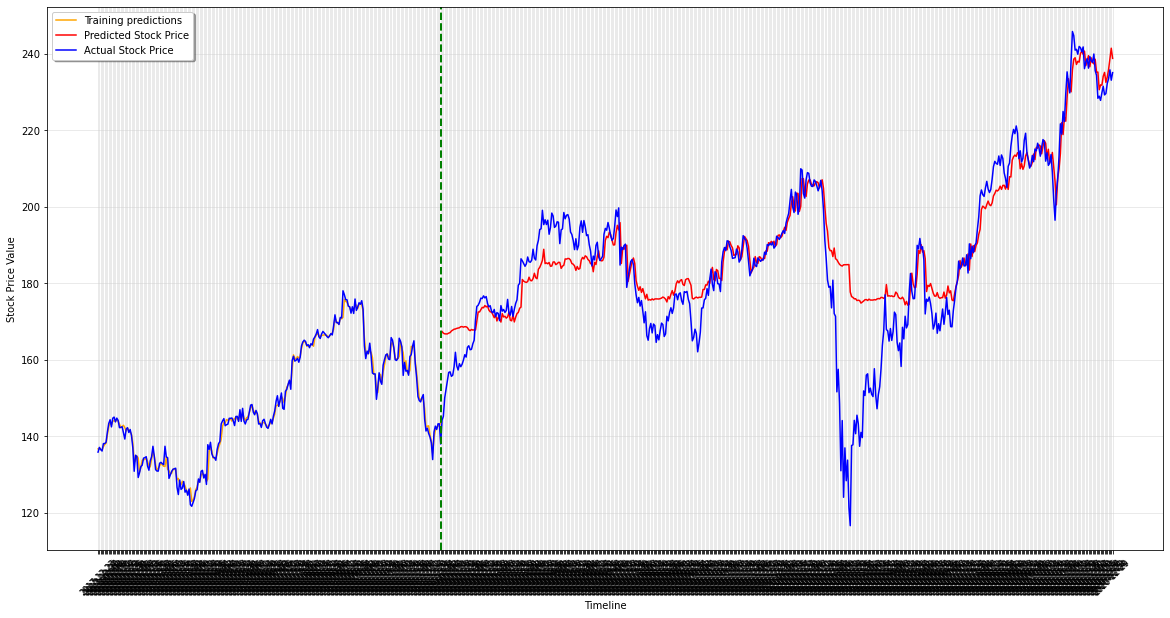

In [37]:
# Chage on attributes and no change on PricePerShare
# Reduced attributes
PRED_TRAIN = sc_predict.inverse_transform(clf2.predict(X_scaled_train))
PRED_FUTURE = sc2_predict.inverse_transform(clf2.predict(X_scaled_test))
# Plot parameters
START_DATE_FOR_PLOTTING = '2017-12-22'
START_INDEX = dataNSC_train.index.get_loc(START_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(dataNSC_train.index[START_INDEX:], PRED_TRAIN[START_INDEX:], color='orange', label='Training predictions')
plt.plot(dataNSC_test.index[:], PRED_FUTURE, color='red', label='Predicted Stock Price')
plt.plot(dataNSC.index[START_INDEX:], dataNSC['CloseNext'][START_INDEX:].values, color='b', label='Actual Stock Price')

plt.axvline(x = dataNSC_train.index[-1], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

#print("RMSE",mean_squared_error(dataNSC_train['CloseNext'], PRED_TRAIN, squared=False))

## Escalamos todo el dataframe

'NSC'

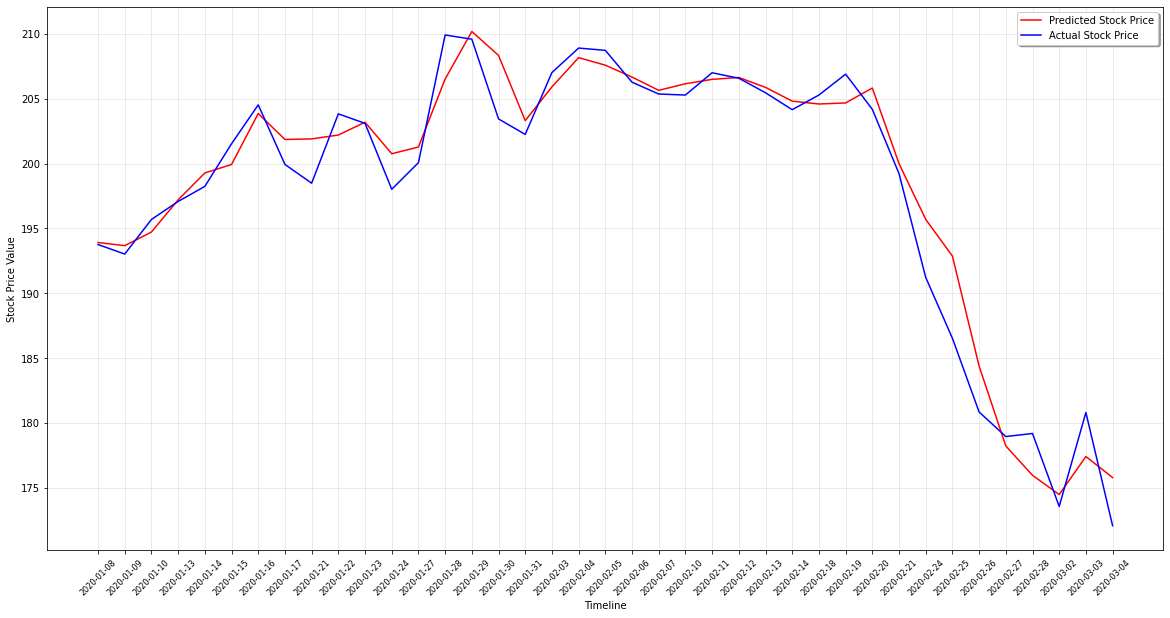

RMSE train 0.6816913199667537
r2Score: 0.9993997802810002
adj_r2Score: 0.9993971081843102
rmse: 1.2100451763935536
mae: 0.2036075413227092
evs: 0.9993998073131146
mape: 0.014189206747563307
random_seeds 3


'GL'

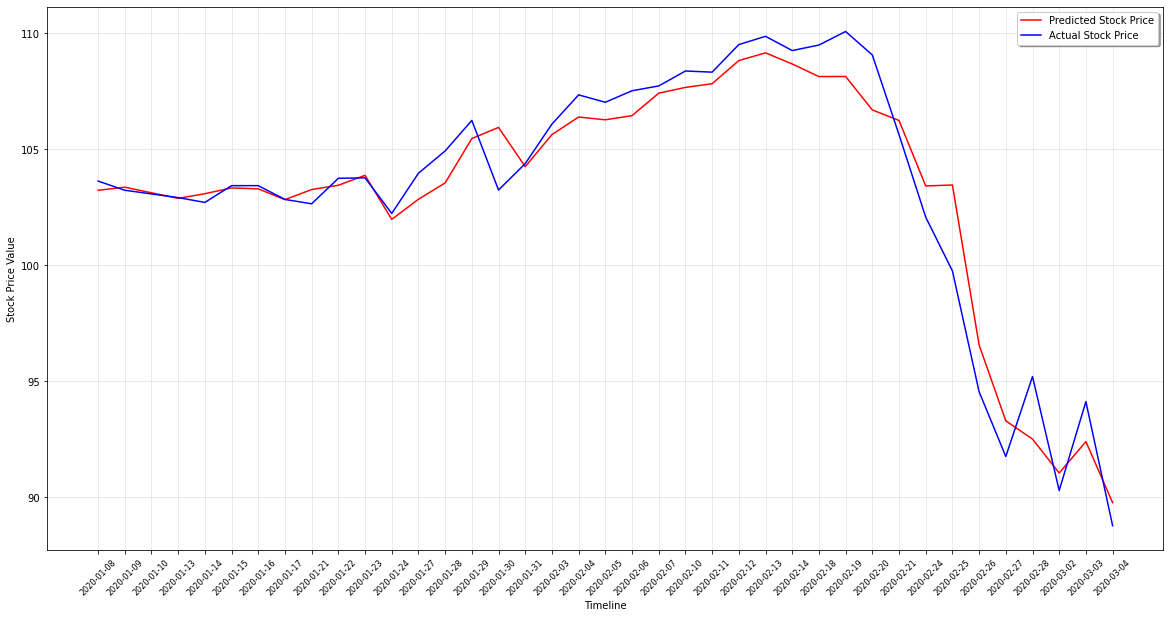

RMSE train 0.3201455455198126
r2Score: 0.9995075628560932
adj_r2Score: 0.9995053705927925
rmse: 0.5683762381930583
mae: 0.1114779829978918
evs: 0.9995076306220176
mape: 0.012853770580910213
random_seeds 3


'PEP'

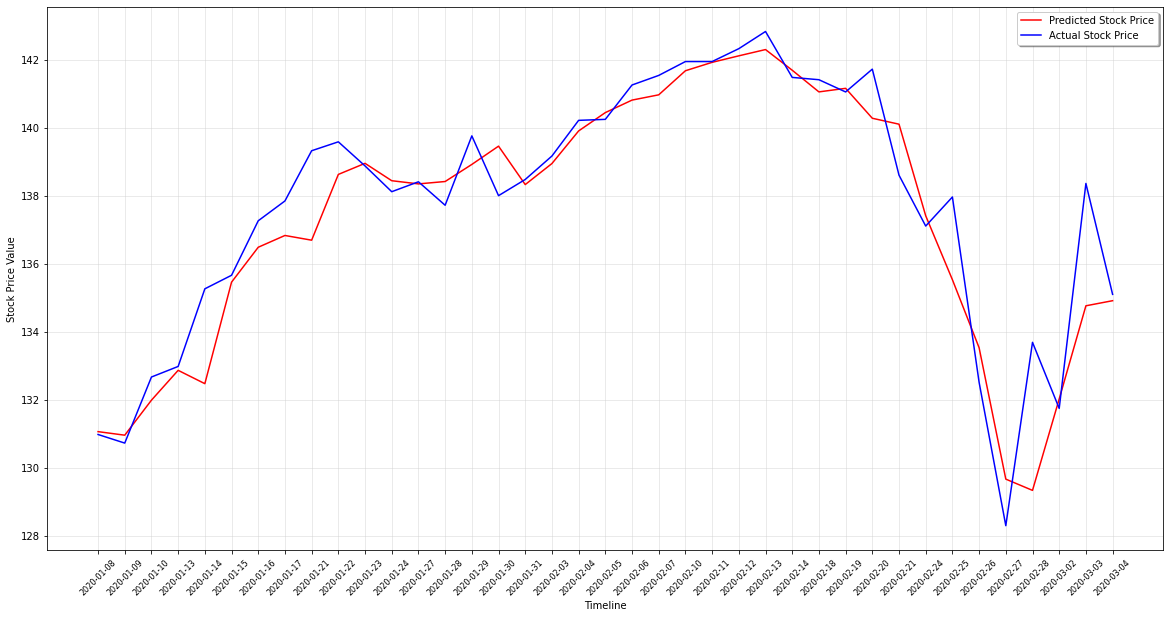

RMSE train 0.40250784780800886
r2Score: 0.999572787980389
adj_r2Score: 0.9995708860904853
rmse: 0.7403397605240786
mae: 0.18929926156997468
evs: 0.9995728882530259
mape: 0.01095945156425015
random_seeds 3


'BDX'

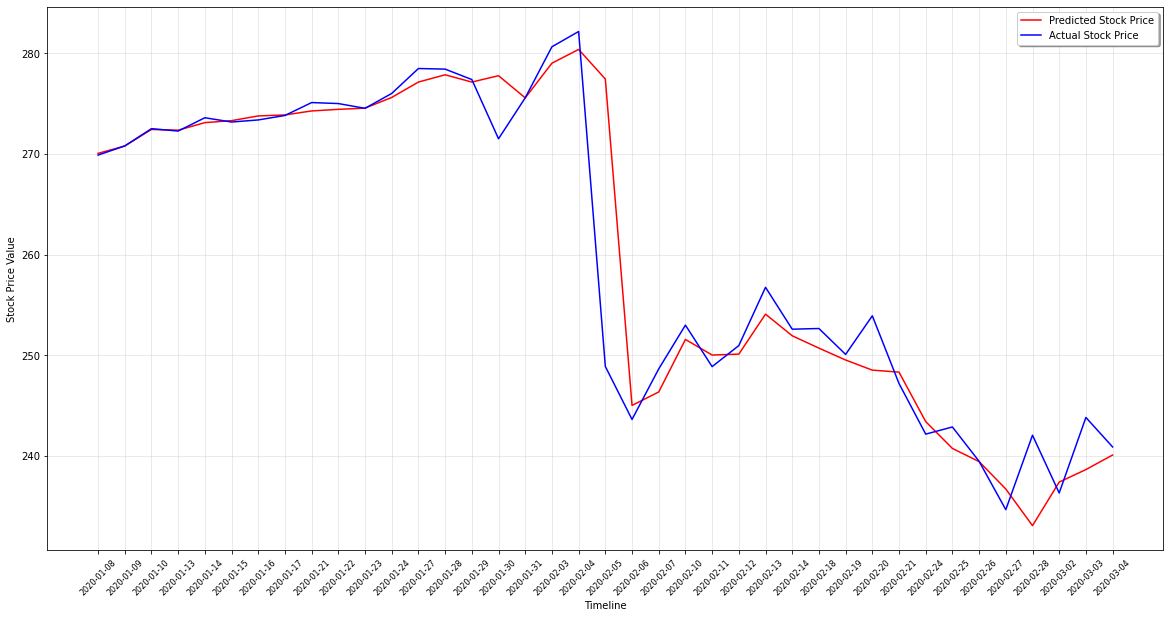

RMSE train 0.8204566454290039
r2Score: 0.999532539727107
adj_r2Score: 0.9995304586574447
rmse: 1.5215660452341944
mae: 0.21195921897890457
evs: 0.9995326657018807
mape: 0.011658230324213158
random_seeds 3


'IBM'

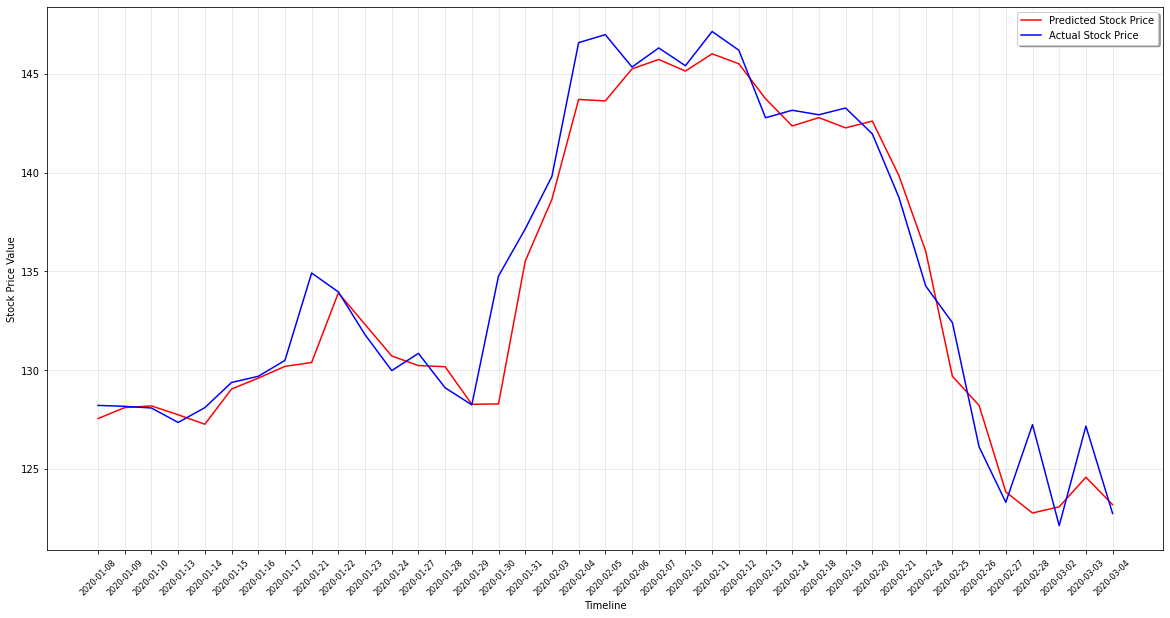

RMSE train 0.6987607504187902
r2Score: 0.9992826945106061
adj_r2Score: 0.9992795011639645
rmse: 1.2595395919916237
mae: 0.3648029804229651
evs: 0.9992827668758221
mape: 0.01241188159191641
random_seeds 3


In [39]:
Params = {'max_features': 0.5, 'max_leaf_nodes': None, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 80, 'oob_score': True, 'rs':[0,2,3]}
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    display(stock)
    df = data.xs(stock, level=1, axis=1)
    df.sort_index(ascending=True, inplace=True)

    X = np.array(df.drop(['CloseNext'], axis=1))
    sc3 = StandardScaler()
    X_scaled = sc.fit_transform(X)
    sc_predict = StandardScaler()
    y_scaled = sc_predict.fit_transform(df.values[:, df.columns.get_loc('CloseNext'):df.columns.get_loc('CloseNext')+1])
    
    rand_stt = None
    min_error = 1000
    for i in Params['rs']:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=4)
        y_train = y_train.ravel()
        y_test = y_test.ravel()
        clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
        clf.fit(X_train,y_train)
        error = mean_squared_error(y_test, clf.predict(X_test), squared=False)
        if error < min_error:
            rand_stt = i
            min_error = error
    
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=rand_stt)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    
    clf = RandomForestRegressor(max_features= Params['max_features'], max_leaf_nodes= Params['max_leaf_nodes'], max_samples= Params['max_samples'], min_samples_leaf= Params['min_samples_leaf'], n_estimators=Params['n_estimators'], oob_score= Params['oob_score'])
    clf.fit(X_train,y_train)
    PRED = sc_predict.inverse_transform(clf.predict(X_scaled))
    y_scaled = sc_predict.inverse_transform(y_scaled)

    # Plot parameters
    START_DATE_FOR_PLOTTING = '2020-01-08'
    ENDING_DATE_FOR_PLOTTING = '2020-03-05'
    START_INDEX = df.index.get_loc(START_DATE_FOR_PLOTTING)
    ENDING_INDEX = df.index.get_loc(ENDING_DATE_FOR_PLOTTING)
    fig1,ax1 = plt.subplots(figsize=(20,10))


    plt.plot(df.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
    plt.plot(df.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

    #plt.axvline(x = df.index[-5], color='green', linewidth=2, linestyle='--')

    plt.grid(which='major', color='#cccccc', alpha=0.5)

    plt.legend(shadow=True)
    #plt.title(params, family='DejaVu Sans', fontsize=12)
    plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
    plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.show()
    
    
    
    pred1 = sc_predict.inverse_transform(clf.predict(X_test))
    y_test = sc_predict.inverse_transform(y_test)
    r2Score = r2_score(y_test,pred1)
    rmse = mean_squared_error(y_test,pred1, squared=False)
    mae=median_absolute_error(y_test,pred1)
    evs=explained_variance_score(y_test, pred1)
    mape=mean_absolute_percentage_error(y_test, pred1)
    p=8
    n=len(y_test)
    Adj_r2 = 1-(1-r2Score)*(n-1)/(n-p-1)
    
    print("RMSE train",mean_squared_error(y_scaled, PRED, squared=False))
    print("r2Score:",r2Score)
    print("adj_r2Score:",Adj_r2)
    print("rmse:",rmse)
    print("mae:",mae)
    print("evs:",evs)
    print("mape:",mape)
    print("random_seeds",i)